img.shape (512, 512)


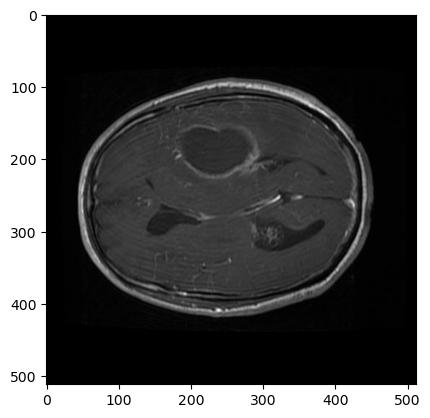

In [71]:
# load x-ray image

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('test_images/0 (239).jpg',0)

print('img.shape',img.shape)
plt.imshow(img,cmap='gray')

In [72]:
# get image width & height

height,width=img.shape
print(height,width)

512 512


In [73]:
# flatten image (2d to 1d) -> 512*512=262144 (262144 pixels)

imgFlatten = img.reshape(height*width,1)
print('imgFlatten.shape :',imgFlatten.shape)
print(imgFlatten[50000:51000])

imgFlatten.shape : (262144, 1)
[[ 11]
 [ 10]
 [  8]
 [  5]
 [  3]
 [  2]
 [  1]
 [  1]
 [  5]
 [  6]
 [  7]
 [  7]
 [  7]
 [  6]
 [  5]
 [  4]
 [  2]
 [  2]
 [  2]
 [  2]
 [  3]
 [  3]
 [  3]
 [  3]
 [  2]
 [  2]
 [  2]
 [  2]
 [  3]
 [  4]
 [  6]
 [  6]
 [  4]
 [  4]
 [  4]
 [  3]
 [  3]
 [  2]
 [  2]
 [  2]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  3]
 [  4]
 [  4]
 [  4]
 [  3]
 [  2]
 [  1]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [  2]
 [ 

In [74]:
# what i am going to do is put brain tumor pixels in one cluster and normal pixels in another cluster

from sklearn.cluster import KMeans # import KMeans 

model=KMeans(n_clusters=5) # separation into two clusters

model.fit(imgFlatten) # training

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [75]:
# get labels (putting pixel 262144, taking the cluster number that comes to those individual pixels)
# possible clusters - 05

labels=model.labels_ # get labels
print('labels shape :',labels.shape)

labels2D=labels.reshape(height,width) # convert 1D to 2D

# print(labels2D)
#print(labels[50000:51000])

labels shape : (262144,)


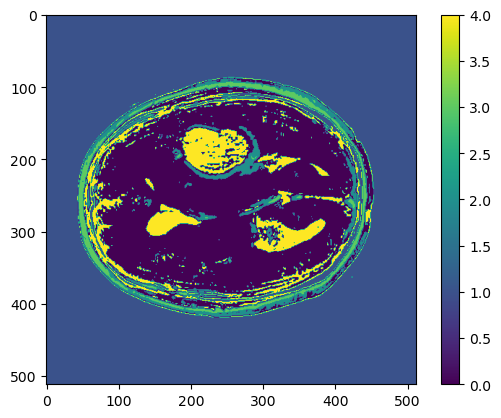

In [76]:
# show conerted image (2d image)
# 0 cluster points - purple color
# 1 cluster points - blue color
# 2 cluster points - turquolse color
# 3 cluster points - green color (tumor)
# 4 cluster points - yellow color


plt.imshow(labels2D)
plt.colorbar()
plt.show()

In [77]:
# save model

import joblib

joblib.dump(model,'brain_tumor_kmeans.sav')

['brain_tumor_kmeans.sav']